# Iris flower ML

## 0. Prep

In [86]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier, DummyRegressor

%matplotlib inline 
plt.rcParams['figure.figsize'] = (15.0, 10.0)

In [14]:
# load the data
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

df = pd.read_csv('./iris.csv',names=columns)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df.shape

(150, 5)

In [16]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## 1. Data visualisation

sepal-length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal-width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal-length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal-width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

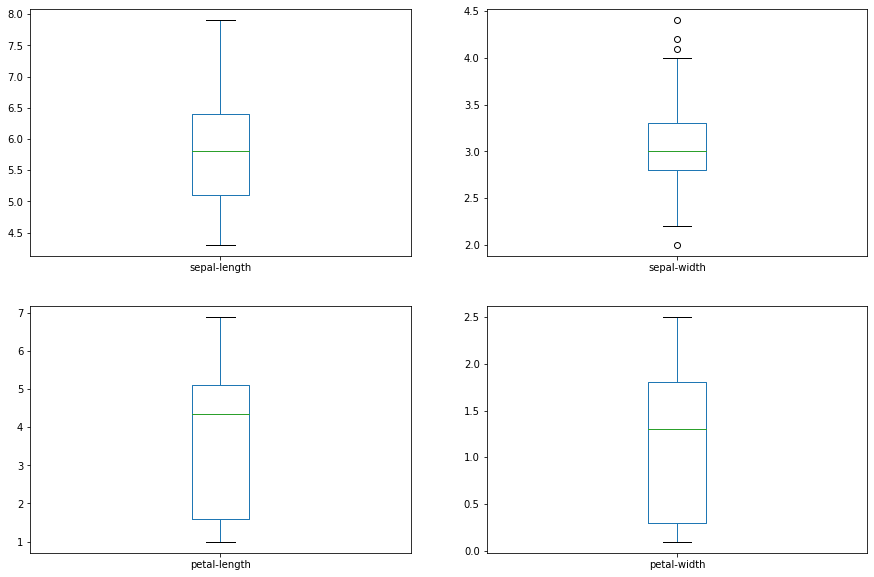

In [18]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f914e641d50>,
      dtype=object)

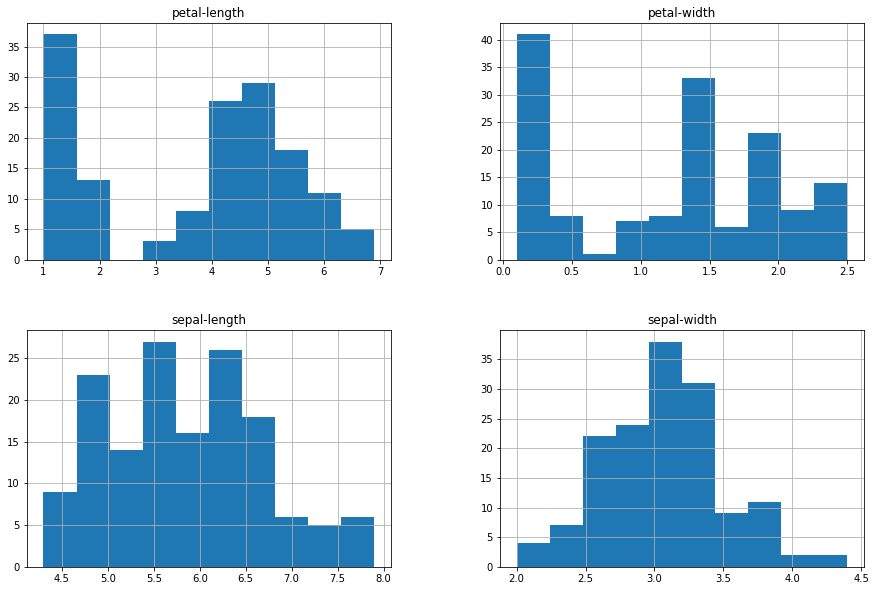

In [19]:
df.hist()

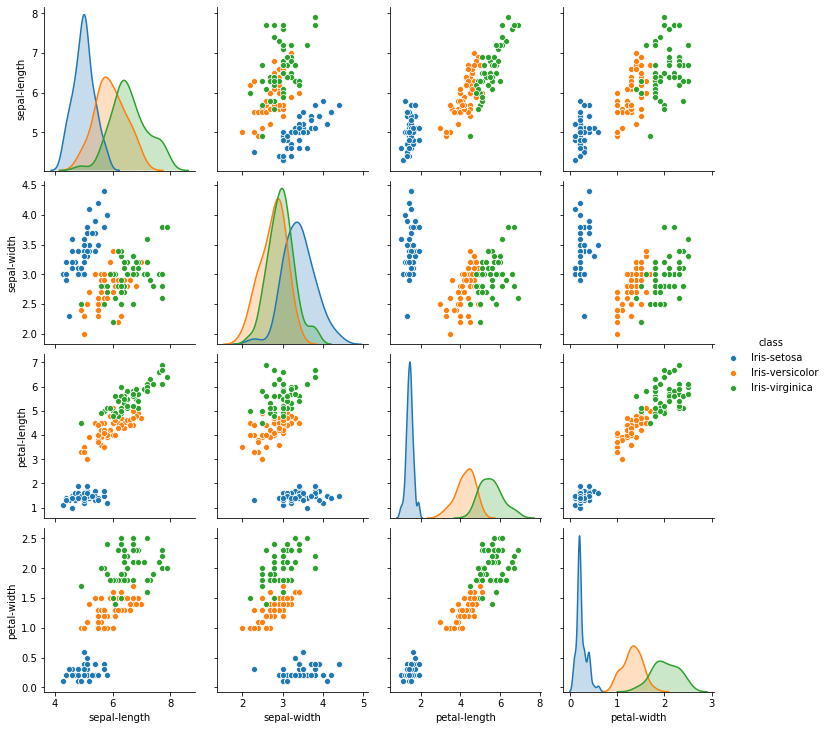

In [27]:
sns.pairplot(df,hue='class')

## 2. Evaluating ML algorithms

In [197]:
## Splitting the dataset into training, testing, and validation subsets
x = df.values[:,0:4]
y = df.values[:,4]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.48)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=.5)

In [198]:
# Initialise the kfolds for cross-validation
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

In [199]:
models = []
models.append(('lr', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('lda', LinearDiscriminantAnalysis()))
models.append(('knn', KNeighborsClassifier()))
models.append(('dtt', DecisionTreeClassifier()))
models.append(('nb', GaussianNB()))
models.append(('svm', SVC(gamma='auto')))
models.append(('dc', DummyClassifier(strategy='prior')))

# evaluate each model in turn
results = {}
names = []

In [200]:
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    model.fit(x_train, y_train)
    score = model.score(x_val, y_val)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    
    results[name] = {
            'score': score,
            'cv': (cv_results.mean(), cv_results.std()),
            }
    
    names.append(name)

In [201]:
dummy_score = results['dc']['score']
dummy_cv = results['dc']['cv']

### Scoring and cross-validating the models

In [202]:
for name in (name for name in names if name != 'dc'):
    res = results[name]
    print("{} score: \t{}\tDummy score: \t{}".format(name, res['score'], dummy_score))
    print("{} CV mean: \t{}\tDummy CV mean: \t{}".format(name, res['cv'][0], dummy_cv[0]))
    print("{} CV std.: \t{}\tDummy CV std.: \t{}".format(name, res['cv'][0], dummy_cv[0]))
    print("################################################################")

lr score: 	0.8333333333333334	Dummy score: 	0.2777777777777778
lr CV mean: 	0.95	Dummy CV mean: 	0.3571428571428571
lr CV std.: 	0.95	Dummy CV std.: 	0.3571428571428571
################################################################
lda score: 	0.9722222222222222	Dummy score: 	0.2777777777777778
lda CV mean: 	0.975	Dummy CV mean: 	0.3571428571428571
lda CV std.: 	0.975	Dummy CV std.: 	0.3571428571428571
################################################################
knn score: 	0.9722222222222222	Dummy score: 	0.2777777777777778
knn CV mean: 	0.9607142857142857	Dummy CV mean: 	0.3571428571428571
knn CV std.: 	0.9607142857142857	Dummy CV std.: 	0.3571428571428571
################################################################
dtt score: 	0.9444444444444444	Dummy score: 	0.2777777777777778
dtt CV mean: 	0.9357142857142857	Dummy CV mean: 	0.3571428571428571
dtt CV std.: 	0.9357142857142857	Dummy CV std.: 	0.3571428571428571
##############################################################

Great! Looks like our models are correct and they are much different from a random-chance dummy model. 🎉

The scores seem a bit high, probably beacause the validation data is so small. But cross-validation is not that far from the scores, so the models perform really well. 

As we can see, the most accure is Linear discriminant analysis at 97.5%. 

## Pedictions

In [203]:
predictions = {}
names = []

for name, model in models:
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    
    predictions[name] = prediction
    
    names.append(name)

In [204]:
for name in names:
    prediction = predictions[name]
    print("\n{} accuracy: \t{}\n".format(name, accuracy_score(y_test, prediction)))
    print("##################################")


lr accuracy: 	1.0

##################################

lda accuracy: 	1.0

##################################

knn accuracy: 	1.0

##################################

dtt accuracy: 	1.0

##################################

nb accuracy: 	1.0

##################################

svm accuracy: 	1.0

##################################

dc accuracy: 	0.3333333333333333

##################################


Okay, this is weird :D